In [1]:
import numpy as np
from matplotlib import pylab as pt
import string
from sklearn.linear_model import LogisticRegression
import numpy.linalg as la
import random
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
# nltk.download()
from nltk.corpus import stopwords
%matplotlib inline  


In [2]:
# http://stackoverflow.com/questions/16050952/how-to-remove-all-the-punctuation-in-a-string-python
# parsed into the data and removed punctuation, also lower the string
# AKA: preprocessing

def parseInFile(name):
    with open (name) as f:
        lines = f.readlines()
    X_data = []
    Y_label = []
    translator = str.maketrans({key: None for key in string.punctuation})
   
    for line in lines:
        temp = line.split('\t')
        word = temp[0].lower().translate(translator)
        X_data.append(word)
        temp2 = temp[1].split('\n')
        Y_label.append(temp2[0])
        
    return X_data, Y_label
        
    
    

In [3]:
# part C
def splitDataSet(data, label):
    count_pos = 0
    count_neg = 0
    i = 0
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    while(i < 1000):
        if(label[i] == '1' and count_pos < 400):
            X_train.append(data[i])
            Y_train.append(label[i])
            count_pos = count_pos + 1
        elif(label[i] == '0' and count_neg < 400):
            X_train.append(data[i])
            Y_train.append(label[i])
            count_neg = count_neg + 1
        else:
            if(label[i] == '0'):
                count_neg = count_neg + 1
            if(label[i] == '1'):
                count_pos = count_pos + 1
            X_test.append(data[i])
            Y_test.append(label[i])
        i = i + 1
    print ('The # postive review is ' + str(count_pos) + ', the # negative review is ' + str(count_neg))
    return X_train, Y_train, X_test, Y_test
            
            

In [4]:
# k means 
def kmeans(word_dict, X_norm_train, k, iteration):

    size = len(word_dict)
    n = len(X_norm_train)
    # generate random number between 0-1 for n
    c = []
    for i in range(n):
        c.append(random.randint(0, k-1))
    # print (c)
    for i in range(iteration):
        m_0 = np.zeros(size)
        m_1 = np.zeros(size)
        for j in range(n):
            if c[j] == 0:
                m_0 += X_norm_train[j, :]
            else:
                m_1 += X_norm_train[j, :]
        m_0 = m_0/float(n-sum(c))
        m_1 = m_1/float(sum(c))
        for j in range(n):
            if la.norm(X_norm_train[j, :] - m_0) < la.norm(X_norm_train[j, :] -m_1):
                c[j] = 0
            else:
                c[j] = 1

    return c, m_0, m_1

In [5]:
X_AMZ, Y_AMZ = parseInFile('sentiment labelled sentences/amazon_cells_labelled.txt')
X_YELP, Y_YELP = parseInFile('sentiment labelled sentences/yelp_labelled.txt')
X_IMDB, Y_IMDB = parseInFile('sentiment labelled sentences/imdb_labelled.txt')
print (len(Y_AMZ))


1000


In [6]:
AMZ_X_train, AMZ_Y_train, AMZ_X_test, AMZ_Y_test = splitDataSet(X_AMZ, Y_AMZ)
YELP_X_train, YELP_Y_train, YELP_X_test, YELP_Y_test = splitDataSet(X_YELP, Y_YELP)
IMDB_X_train, IMDB_Y_train, IMDB_X_test, IMDB_Y_test = splitDataSet(X_IMDB, Y_IMDB)


The # postive review is 500, the # negative review is 500
The # postive review is 500, the # negative review is 500
The # postive review is 500, the # negative review is 500


In [7]:
# part D Bag of Words Implementation
# Explain why we can’t use testing set at this point

# First, we combine all training data and test data
X_train = AMZ_X_train + YELP_X_train + IMDB_X_train
Y_train = AMZ_Y_train + YELP_Y_train + IMDB_Y_train

X_test = AMZ_X_test + YELP_X_test + IMDB_X_test
Y_test = AMZ_Y_test + YELP_Y_test + IMDB_Y_test

print ("training data length is " + str(len(X_train)) + ", test data length is " + str(len(X_test)))
# creat dict first
word_dict = {}
stop = set(stopwords.words('english'))
wnl = WordNetLemmatizer()
dict_count = 0
for i in range(len(X_train)):
    temps = X_train[i].split()
    for temp in temps:
        temp = wnl.lemmatize(temp)
        if temp not in word_dict:
            if temp not in stop:
                word_dict[temp] = dict_count
                dict_count += 1


# build the feature vector
X_feature_train = []
for i in range(len(X_train)):
    vector = np.zeros(dict_count)
    temps = X_train[i].split()
    for temp in temps:
        temp = wnl.lemmatize(temp)
        if temp in word_dict:
            vector[word_dict[temp]] += 1
    X_feature_train.append(vector)
        
X_feature_train = np.array(X_feature_train)
print (X_feature_train.shape)


X_feature_test = []
for i in range(len(X_test)):
    vector = np.zeros(dict_count)
    temps = X_test[i].split()
    for temp in temps:
        temp = wnl.lemmatize(temp)
        if temp in word_dict:
            vector[word_dict[temp]] += 1
    X_feature_test.append(vector)
X_feature_test = np.array(X_feature_test)
print (X_feature_test.shape)
print (len(word_dict))

training data length is 2400, test data length is 600
(2400, 4243)
(600, 4243)
4243


[ 1.  1.  1. ...,  0.  0.  0.]


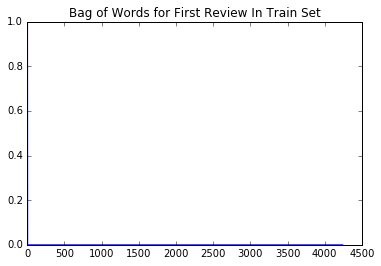

[ 0.  0.  0. ...,  1.  1.  1.]


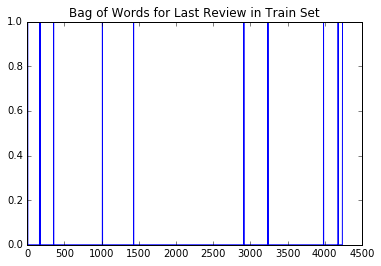

In [8]:
print (X_feature_train[0])
Xs = np.arange(dict_count)
pt.plot(Xs, X_feature_train[0,:])
pt.title('Bag of Words for First Review In Train Set')
pt.show()

print (X_feature_train[-1])
pt.title('Bag of Words for Last Review in Train Set')
pt.plot(Xs, X_feature_train[-1,:])
pt.show()

In [9]:
# e post processing now
# I choose l2 normalization
X_norm_train = np.zeros(X_feature_train.shape)
for i in range(len(X_train)):
    if (la.norm(X_feature_train[i,:]) != 0):
        X_norm_train[i,:] = X_feature_train[i,:]/float(la.norm(X_feature_train[i,:]))
# print (X_norm_train[0,:])
X_norm_test = np.zeros(X_feature_test.shape)
for i in range(len(X_test)):
    if (la.norm(X_feature_test[i,:]) != 0):
        X_norm_test[i,:] = X_feature_test[i,:]/float(la.norm(X_feature_test[i,:]))
    else:
        X_norm_test[i,:] = X_feature_test[i,:]
# print (X_norm_test[0,:])

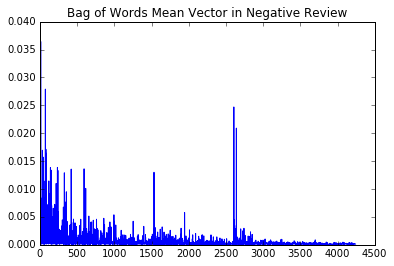

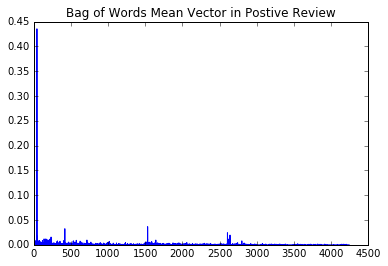

In [10]:
c, m_0, m_1 = kmeans(word_dict, X_norm_train, 2, 20)
size = len(word_dict)
Xs = np.arange(size)
pt.figure()
pt.title('Bag of Words Mean Vector in Negative Review')
pt.plot(Xs, m_0)
pt.show()
pt.title('Bag of Words Mean Vector in Postive Review')
pt.plot(Xs, m_1)
pt.show()

In [11]:
def get_accuracy(c, Y_train):
    count = 0
    for i in range(len(c)):
        if str(c[i])  == Y_train[i]:
            count +=1
    accuracy = count / float(len(c))
    return (accuracy)
print ("K means accuracy is " + str(get_accuracy(c, Y_train)))

K means accuracy is 0.48333333333333334


In [12]:
# http://scikit-learn.org/stable/modules/linear_model.html
def get_key_words_and_accuracy(word_dict,X_norm_train, Y_train, X_norm_test, Y_test, threhold):
   
    lg = LogisticRegression()
    lg.fit(X_norm_train, Y_train)
    lg_pred = lg.predict(X_norm_test)
    count = 0
    for i in range(len(lg_pred)):
        if lg_pred[i]  == Y_test[i]:
            count +=1
    accuracy = count / float(len(lg_pred))
    print ("logistic regression accuracy is " + str(accuracy) + "!")

    coeff = lg.coef_[0]
    key_index = []
    key_words = []
    for i in range(len(coeff)):
        if abs(coeff[i]) > threhold:
            key_index.append(i)
    for index in key_index:
        for k in word_dict:
            if word_dict[k] == index:
                key_words.append(k)

    return key_words
    

In [13]:

print (get_key_words_and_accuracy(word_dict, X_norm_train, Y_train, X_norm_test, Y_test,1.34))

logistic regression accuracy is 0.78!
['good', 'excellent', 'great', 'waste', 'comfortable', 'loved', 'best', 'didnt', 'doesnt', 'well', 'poor', 'fine', 'nice', 'love', 'happy', 'bad', 'cool', 'beautiful', 'dont', 'minute', 'fantastic', 'slow', 'awesome', 'worst', 'horrible', 'disappointment', 'terrible', 'disappointing', 'stupid', 'nothing', 'friendly', 'liked', 'amazing', 'awful', 'wonderful', 'delicious', 'interesting']


In [14]:
#h) N-gram model
# creat dict first
gram_dict = {}
gram_count = 0
# iterate over the entire reviews
for i in range(len(X_train)):
    review = X_train[i].split()
    for j in range(len(review) - 1):
        
        gram_word = review[j] + " " + review[j + 1]
        if gram_word not in gram_dict:
            gram_dict[gram_word] = gram_count
            gram_count += 1


# build the feature vector
X_gram_train = []
for i in range(len(X_train)):
    vector = np.zeros(gram_count)
    review = X_train[i].split()
    for j in range(len(review) - 1):
        review[j] = wnl.lemmatize(review[j])
        review[j + 1] = wnl.lemmatize(review[j + 1])
        if review[j] and review[j + 1] not in stop:
            gram_word = review[j] + " " + review[j + 1]
            if gram_word in gram_dict:
                vector[gram_dict[gram_word]] += 1
    X_gram_train.append(vector)
        
X_gram_train = np.array(X_gram_train)
print (X_gram_train.shape)


X_gram_test = []
for i in range(len(X_test)):
    vector = np.zeros(gram_count)
    review = X_test[i].split()
    for j in range(len(review) - 1):
        review[j] = wnl.lemmatize(review[j])
        review[j + 1] = wnl.lemmatize(review[j + 1])
        if review[j] and review[j + 1] not in stop:
            gram_word = review[j] + " " + review[j + 1]
            if gram_word in gram_dict:
                vector[gram_dict[gram_word]] += 1
    X_gram_test.append(vector)
X_gram_test = np.array(X_gram_test)
print (X_feature_test.shape)

(2400, 16834)
(600, 4243)


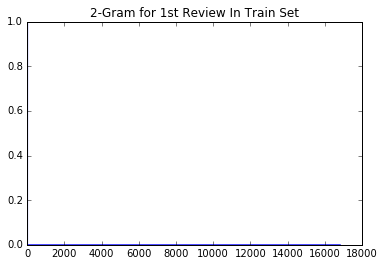

[ 0.  0.  0. ...,  1.  1.  1.]


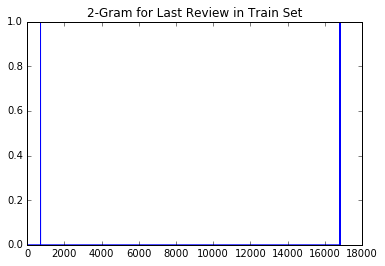

In [15]:
Xs = np.arange(gram_count)
pt.figure()
pt.title('2-Gram for 1st Review In Train Set')
pt.plot(Xs, X_gram_train[0,:])
pt.show()
print (X_feature_train[-1])
pt.title('2-Gram for Last Review in Train Set')
pt.plot(Xs, X_gram_train[-1,:])
pt.show()

In [16]:
Xg_norm_train = np.zeros(X_gram_train.shape)
for i in range(len(X_train)):
    if float(sum(X_gram_train[i,:])) != 0:
        Xg_norm_train[i,:] = X_gram_train[i,:]/la.norm(sum(X_gram_train[i,:]))
# print (X_norm_train[0,:])
Xg_norm_test = np.zeros(X_gram_test.shape)
for i in range(len(X_test)):
    if float(sum(X_gram_test[i,:])) != 0:
        Xg_norm_test[i,:] = X_gram_test[i,:]/la.norm(sum(X_gram_test[i,:]))

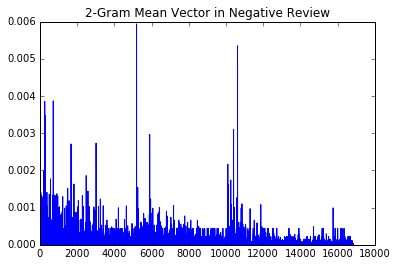

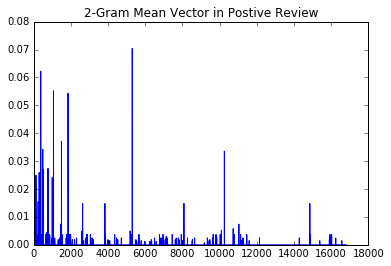

In [17]:
gc, gm_0, gm_1 = kmeans(gram_dict, Xg_norm_train, 2, 20)
size = len(gram_dict)
Xs = np.arange(size)
pt.figure()
pt.title('2-Gram Mean Vector in Negative Review')
pt.plot(Xs, gm_0)
pt.show()
pt.title('2-Gram Mean Vector in Postive Review')
pt.plot(Xs,gm_1)
pt.show()

In [18]:
print ("K means accuracy is " + str(get_accuracy(gc, Y_train)))


K means accuracy is 0.5179166666666667


In [19]:
print ("the keywords for 2-Gram is : ")
print (get_key_words_and_accuracy(gram_dict, Xg_norm_train, Y_train, Xg_norm_test, Y_test, 1.0))

the keywords for 2-Gram is : 
logistic regression accuracy is 0.6866666666666666!
['very good', 'the best', 'a great', 'i love', 'the price', 'very disappointed', 'dont waste', 'not work', 'great product', 'the service', 'is good', 'great phone', 'work great', 'the worst', 'not good', 'an excellent', 'i loved', 'i liked']


In [20]:
def PCA(X_norm_train, X_norm_test, dimension):
    U, D, VT = la.svd(X_norm_train)
    VqT = VT[:dimension]
    X_train_pca = np.zeros((len(X_norm_train), dimension))
    for i in range(len(X_norm_train)):
        X_train_pca[i, :] = VqT.dot(X_norm_train[i, :])
    X_test_pca = np.zeros((len(X_norm_test), dimension))
    for i in range(len(X_norm_test)):
        X_test_pca[i, :] = VqT.dot(X_norm_test[i, :])
    
    size = dimension
    iterations = 20
    n = len(X_train_pca)
    c = []
    for i in range(n):
        c.append(random.randint(0, 1))
    # print (c)
    for i in range(iterations):
        m_0 = np.zeros(size)
        m_1 = np.zeros(size)
        for j in range(n):
            if c[j] == 0:
                m_0 += X_train_pca[j, :]
            else:
                m_1 += X_train_pca[j, :]
        m_0 = m_0/float(n-sum(c))
        m_1 = m_1/float(sum(c))
        for j in range(n):
            if la.norm(X_train_pca[j, :] - m_0) < la.norm(X_train_pca[j, :] -m_1):
                c[j] = 0
            else:
                c[j] = 1

    return c, m_0, m_1, X_train_pca, X_test_pca

In [21]:
c_pca10, m_0_pca10, m_1_pca10, X_train_pca10, X_test_pca10 = PCA(X_norm_train, X_norm_test, 10)

In [22]:
print ("K means accuracy is " + str(get_accuracy(c_pca10, Y_train)))


K means accuracy is 0.5166666666666667


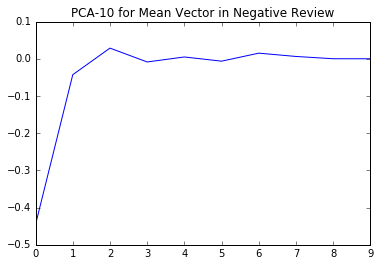

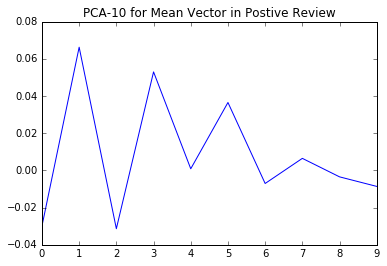

In [23]:
Xs = np.arange(10)
pt.figure()
pt.title('PCA-10 for Mean Vector in Negative Review')
pt.plot(Xs, m_0_pca10)
pt.show()
pt.title('PCA-10 for Mean Vector in Postive Review')
pt.plot(Xs, m_1_pca10)
pt.show()

In [24]:
def get_lr_accuracy(X_train_pca, Y_train, X_test_pca, Y_test):
    lg = LogisticRegression()
    lg.fit(X_train_pca, Y_train)
    lg_pred = lg.predict(X_test_pca)
    count = 0
    for i in range(len(lg_pred)):
        if lg_pred[i]  == Y_test[i]:
            count +=1
    accuracy = count / float(len(lg_pred))
    return accuracy
 

In [25]:
print ("logistic regression accuracy for PCA10 is " + str(get_lr_accuracy(X_train_pca10, Y_train, X_test_pca10, Y_test)) + "!")

logistic regression accuracy for PCA10 is 0.6216666666666667!


In [26]:
c_pca50, m_0_pca50, m_1_pca50, X_train_pca50, X_test_pca50 = PCA(X_norm_train, X_norm_test, 50)
print (get_accuracy(c_pca50, Y_train))

0.5166666666666667


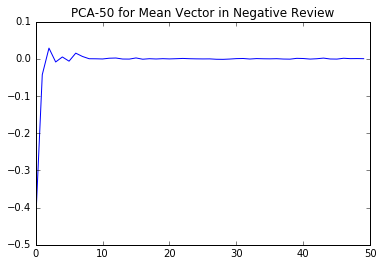

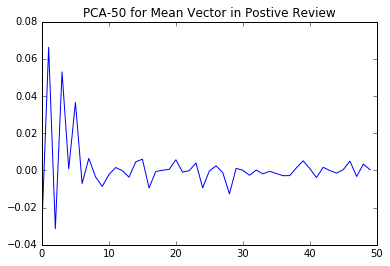

In [27]:
Xs = np.arange(50)
pt.figure()
pt.title('PCA-50 for Mean Vector in Negative Review')
pt.plot(Xs, m_0_pca50)
pt.show()
pt.title('PCA-50 for Mean Vector in Postive Review')
pt.plot(Xs, m_1_pca50)
pt.show()

In [28]:
print ("logistic regression for PCA50 accuracy is " + str(get_lr_accuracy(X_train_pca50, Y_train, X_test_pca50, Y_test)) + "!")

logistic regression for PCA50 accuracy is 0.6683333333333333!


In [29]:
c_pca100, m_0_pca100, m_1_pca100, X_train_pca100, X_test_pca100 = PCA(X_norm_train, X_norm_test, 100)
print ("K means accuracy is " + str(get_accuracy(c_pca100, Y_train)))


K means accuracy is 0.48333333333333334


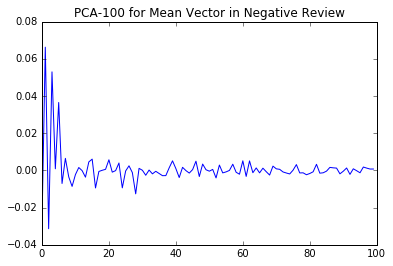

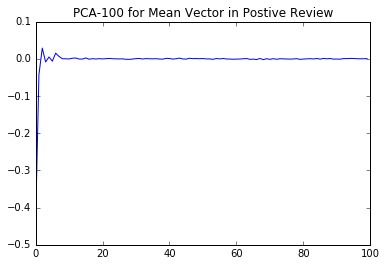

In [30]:
Xs = np.arange(100)
pt.figure()
pt.title('PCA-100 for Mean Vector in Negative Review')
pt.plot(Xs, m_0_pca100)
pt.show()
pt.title('PCA-100 for Mean Vector in Postive Review')
pt.plot(Xs, m_1_pca100)
pt.show()

In [31]:
print ("logistic regression for PCA100 accuracy is " + str(get_lr_accuracy(X_train_pca100, Y_train, X_test_pca100, Y_test)) + "!")

logistic regression for PCA100 accuracy is 0.7316666666666667!
